In [1]:
from src.Funciones import *

In [151]:
def buscaEsquina(m, j, e1, e2):
    ind = -1
    val = (10.0)**300
    for i in range(8):
        if not(i==e1 or i==e2):
            if (m[i][j]>0):
                c = m[i][10]/m[i][j]
                if c < val:
                    val = c
                    ind = i
    return ind
def opera(m,e,s):
    m[s] = m[s]/(m[s][e])
    for i in range(8):
        if i!=s:
            piv=m[i][e]
            m[i] = m[i]-(m[s]*piv)

def pmat(m):
    for i in range(len(m)):
        lin = ""
        for j in range(len(m[0])):
            lin = lin+"\t"+str(round(m[i][j],2))
        print(lin)
    print("")
    
def calcVerticesFBZ(b1, b2):
    pts = []
    vecinos=[m2V(b1,b2,( 1, 0)),m2V(b1,b2,( 1, 1)),
             m2V(b1,b2,( 0, 1)),m2V(b1,b2,(-1, 1)),
             m2V(b1,b2,(-1, 0)),m2V(b1,b2,(-1,-1)),
             m2V(b1,b2,( 0,-1)),m2V(b1,b2,( 1,-1))]
    # Creamos el espacio para la matriz en que operaremos
    v = np.array(vecinos)
    eq = np.zeros((8,11))
    et = ["V1","V2","V3","V4","V5","V6","V7","V8"]
    xy = [10,10]
    cruce = [-1,-1]
    # Damos los valores correspondientes
    for i in range(8):
        eq[i][i] = 1
        eq[i][8] = 2*v[i][0]
        eq[i][9] = 2*v[i][1]
        eq[i][10] = (v[i][0]**2) + (v[i][1]**2)
    pmat(eq)
    # Entra valor de X
    ind = buscaEsquina(eq,8,xy[0],xy[1])
    xy[0]=ind
    cruce[0]=ind
    opera(eq,8,ind)
    # Entra valor de Y
    ind = buscaEsquina(eq,9,xy[0],xy[1])
    xy[1]=ind
    cruce[1]=ind
    opera(eq,9,ind)
    p = (round(eq[xy[0]][10],10),round(eq[xy[1]][10],10))
    pts.append(p)
    pmat(eq)
    cont=0
    while True:
        cont+=1
        e = cruce[0]
        s = buscaEsquina(eq,e,xy[0],xy[1])
        opera(eq,e,s)
        pmat(eq)
        cruce[0] = cruce[1]
        cruce[1] = s
        p2 = (round(eq[xy[0]][10],10),round(eq[xy[1]][10],10))
        if p2!=p:
            if p2==pts[0]:
                break
            p=p2
            pts.append(p)
        if cont>10:
            break
    
    return pts, eq


In [155]:
a, eq=calcVerticesFBZ((6.0,0.0),(0.0,3.0))

	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	36.0
	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	6.0	45.0
	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	6.0	9.0
	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	-12.0	6.0	45.0
	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	-12.0	0.0	36.0
	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	-12.0	-6.0	45.0
	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	-6.0	9.0
	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	12.0	-6.0	45.0

	0.08	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0
	-0.17	0.17	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	1.5
	1.0	-1.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
	2.0	-1.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	72.0
	1.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	72.0
	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	90.0
	-1.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	18.0
	-2.0	1.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	18.0

	0.0	0.08	-0.08	0.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0
	0.0	0.0	0.17	0.0	0.0	0.0	0.0	0.0	0.0	1.0	1.5
	1.0	-1.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
	0.0	1.0	-2.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	72.0
	0.0	1.0	-1.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	72.0
	0.0	1.0	0.0	

In [156]:
a

[(3.0, 1.5), (-3.0, 1.5), (-3.0, -1.5), (3.0, -1.5)]

In [123]:
from matplotlib.patches import Polygon

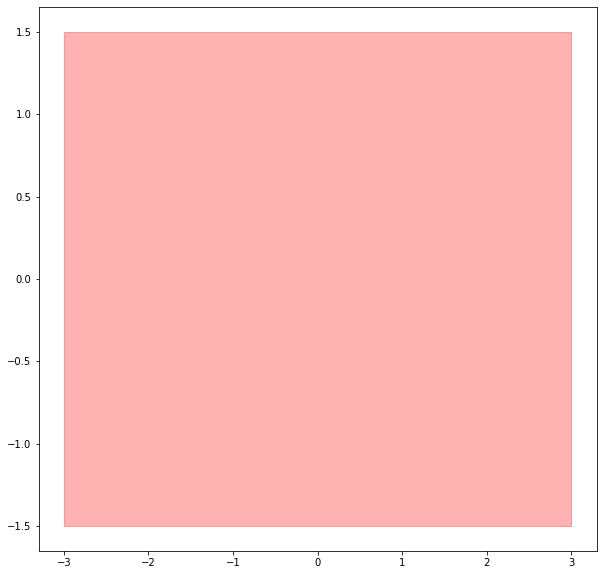

In [157]:
ax = plt.subplot()
hexa=Polygon(a,alpha=0.3, color = 'red')
ax.add_patch(hexa)
ax.autoscale_view()

In [133]:
plt.show()